# Master M2 MVA 2018/2019 - Graphical models - HWK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.LDA import LDA
from utils.LogisticRegression import LogisticRegression
from utils.LinearRegression import LinearRegression
from utils.QDA import QDA
import numpy as np

#### Load datasets sets

In [2]:
train_A = pd.read_table("data/classificationA.train", header=None)
train_B = pd.read_table("data/classificationB.train", header=None)
train_C = pd.read_table("data/classificationC.train", header=None)
test_A = pd.read_table("data/classificationA.test", header=None)
test_B = pd.read_table("data/classificationB.test", header=None)
test_C = pd.read_table("data/classificationC.test", header=None)

train_A = train_A.values
train_B = train_B.values
train_C = train_C.values
test_A = test_A.values
test_B = test_B.values
test_C = test_C.values

train = {'A': train_A, 'B': train_B, 'C': train_C}
test = {'A': test_A, 'B': test_B, 'C': test_C}

## 1. Generative model (LDA)

$$Y\sim\mathcal{B}(\pi),\enspace X|\{Y = i\}\sim\mathcal{N}(\mu_{i}, \Sigma). $$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\hat{\Sigma}=\frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=0\}}(x_{i}-\hat{\mu}_{0})(x_{i}-\hat{\mu}_{0})^{T}+\mathbb{1}_{\{y_{i}=1\}}(x_{i}-\hat{\mu}_{1})(x_{i}-\hat{\mu}_{1})^{T}$$

$$p(y=1|x)=\frac{1}{2} \Leftrightarrow \left(\Sigma^{-1}(\mu_{1}-\mu_{0})\right)^{T}x + \frac{1}{2}\mu_{1}^{T}\Sigma^{-1}\mu_{1}-\frac{1}{2}\mu_{0}^{T}\Sigma^{-1}\mu_{0} = \log\left(\frac{\pi}{1-\pi}\right)$$

No handlers could be found for logger "matplotlib.legend"


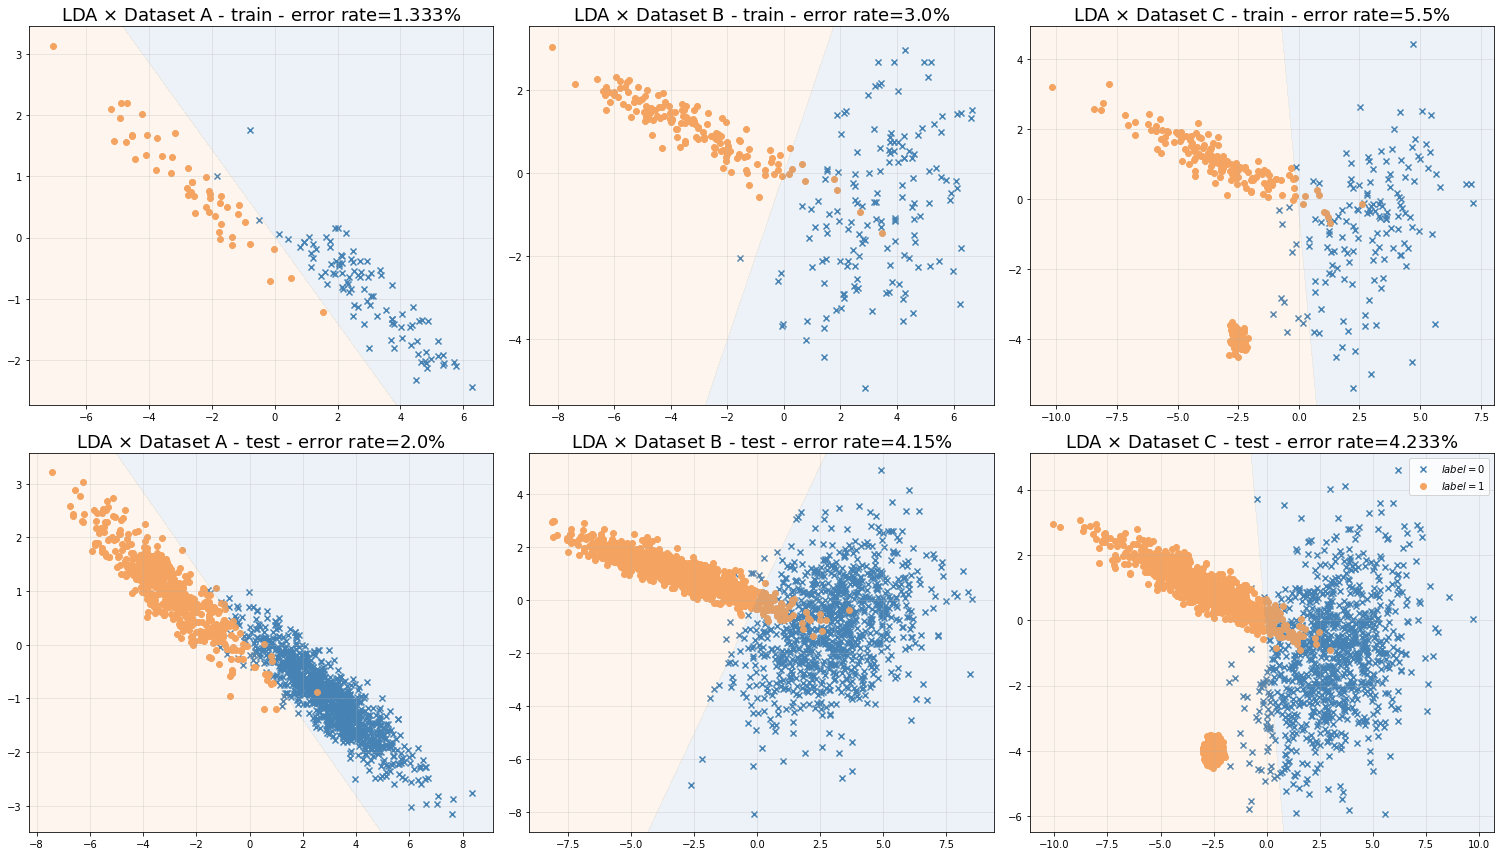

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    lda = LDA()
    lda.fit(X_train, y_train)
    
    missclassification = lda.missclassification(X_train, y_train)
    title = r"LDA $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification,3)) + "%"
    ax[0][idx] = lda.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = lda.missclassification(X_test, y_test)
    title = r"LDA $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification,3)) + "%"
    ax[1][idx] = lda.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()

## 2. Logistic regression

$$ Y\,|\,X \sim \mathcal{B}\left(\sigma(w^{T}X+b)\right)$$

$$p(y=1|x)=\frac{1}{2}\Leftrightarrow x\perp w$$

$$\ell(w) = \sum_{i=1}^{n}y_{i}\log\sigma(w^{T}x_{i}) + (1-y_{i})\log\sigma(-w^{T}x_{i})$$

$$\nabla\ell(w) = X^{t}(y-\eta)\, , \enspace \eta_{i} = \sigma(w^{T}x_{i})$$

$$H\ell(w) = -X^{T}Diag(\eta_{i}(1-\eta_{i}))X$$

Ridge regularisation of the model gives us :

$$\mathcal{L}(\beta, w) = \ell(w) + \frac{\beta}{2}\|w\|^{2}$$

$$\nabla\mathcal{L}(\beta, w) = \nabla\ell(w) + \beta w$$

$$H\mathcal{L}(\beta, w) = H\ell(w) + \beta I$$

Still, it will not be required to fit our model, we will set `beta=0`

We set the convergence criteria on $\ell(w)$

utils/LogisticRegression.py:10: RuntimeWarning: divide by zero encountered in log
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))
utils/LogisticRegression.py:10: RuntimeWarning: invalid value encountered in multiply
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))


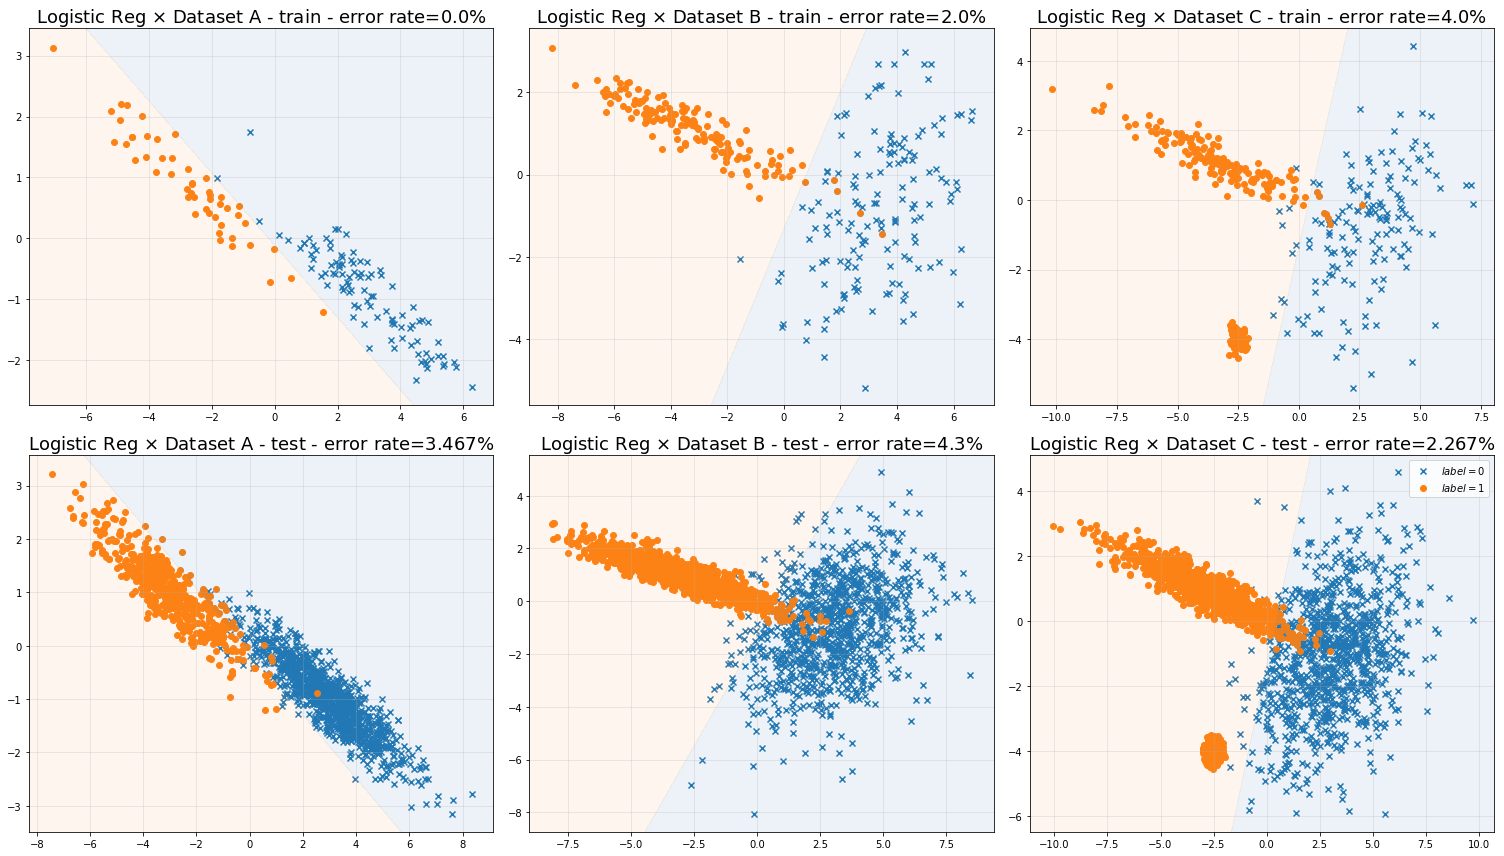

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    logreg = LogisticRegression()
    np.random.seed(17)
    logreg.fit(X_train, y_train)
    
    missclassification = logreg.missclassification(X_train, y_train)
    title = r"Logistic Reg $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification,3)) + "%"
    ax[0][idx] = logreg.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = logreg.missclassification(X_test, y_test)
    title = r"Logistic Reg $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification,3)) + "%"
    ax[1][idx] = logreg.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()

We notice the model is very sensitive to its initialization, regarding the seed used results can be very dissimilar. This lack of robustness wrt could be helped by proceeding to an Armijo Line Search for the learning rate and some regularisation. Also, different convergence criteria could be tested.

## 3. Linear regression

$$ Y\,|\,X\sim\mathcal{N}\left(w^{T}X,\sigma^{2}\right) $$

$$ \hat{w} = (X^{T}X)^{-1}X^{T}y $$

$$p(y=1|x) = \frac{1}{2}\Leftrightarrow x^{T}w = \frac{1}{2}$$

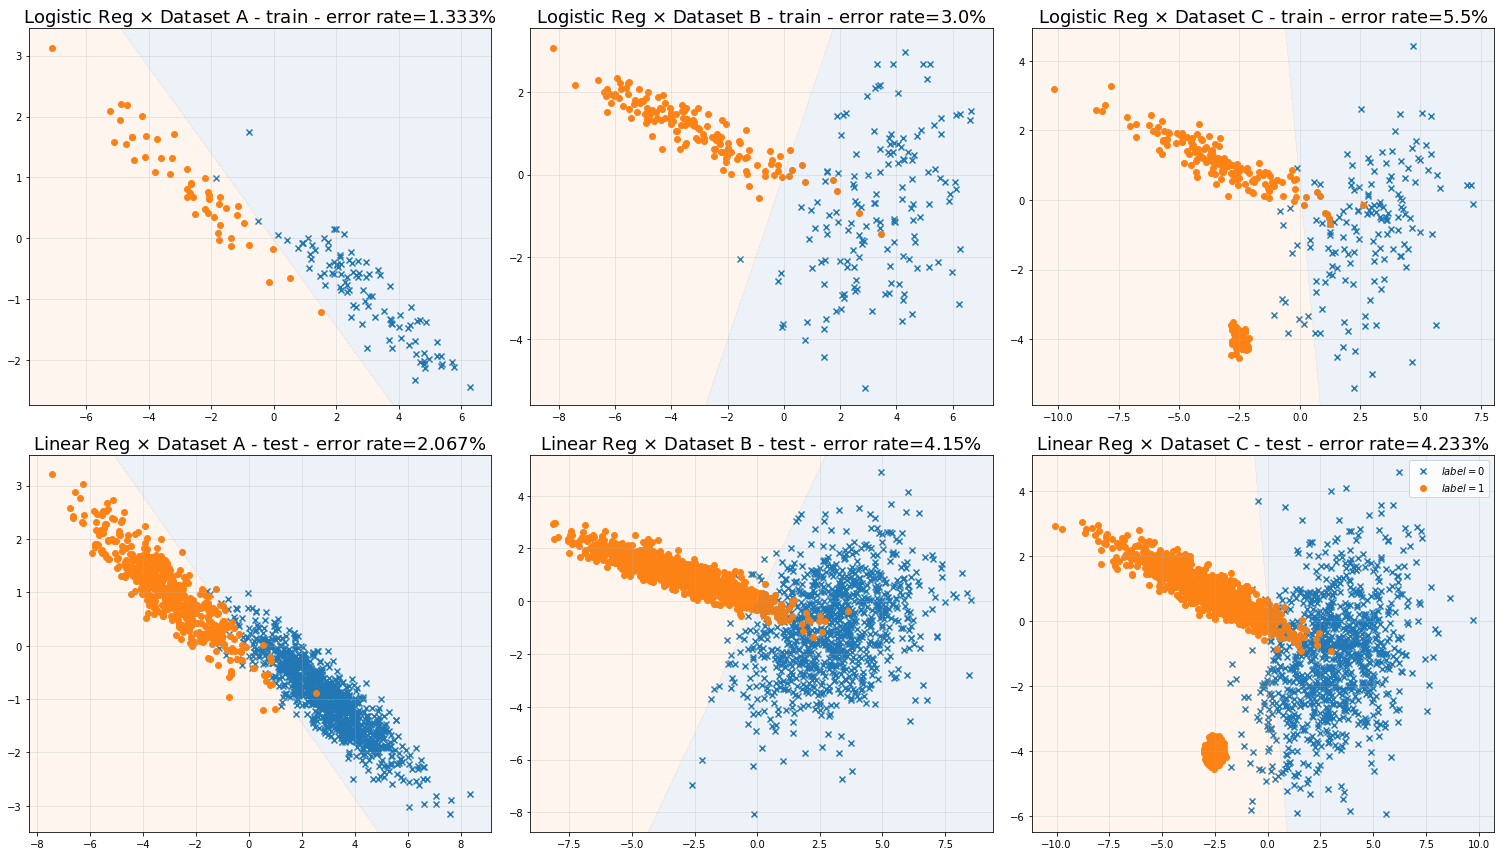

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    missclassification = linreg.missclassification(X_train, y_train)
    title = r"Logistic Reg $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification,3)) + "%"
    ax[0][idx] = linreg.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = linreg.missclassification(X_test, y_test)
    title = r"Linear Reg $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification,3)) + "%"
    ax[1][idx] = linreg.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()

## 5. QDA model

$$ Y\sim\mathcal{B}(\pi), \enspace X\,|\,\{Y\!=\!i\}\sim\mathcal{N}\left(\mu_{i}, \Sigma_{i}\right)$$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\forall j\in\{0,1\}, \enspace\hat{\Sigma}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}(x_{i}-\hat{\mu}_{j})(x_{i}-\hat{\mu}_{j})^{T}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$p(y=1|x)=\frac{1}{2}\Leftrightarrow\frac{1}{2}\log\left(\frac{\det \Sigma_{1}^{-1}}{\det \Sigma_{0}^{-1}}\right)+\frac{1}{2}\left[(x-\mu_{1})^{T}\Sigma_{1}^{-1}(x-\mu_{1})-(x-\mu_{0})^{T}\Sigma_{0}^{-1}(x-\mu_{0})\right] = \log\left(\frac{\pi}{1-\pi}\right)$$

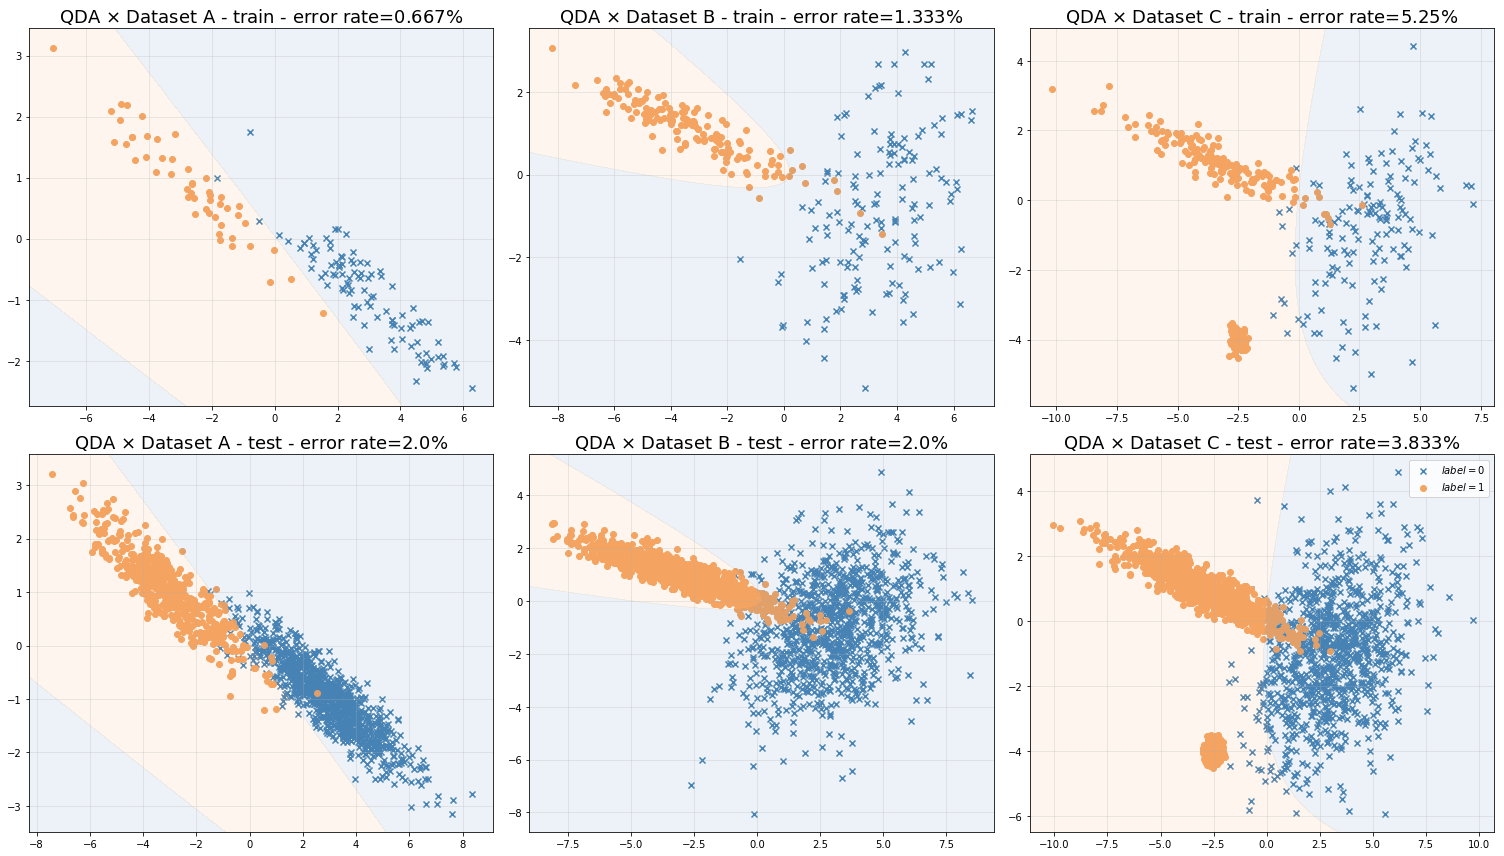

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    qda = QDA()
    qda.fit(X_train, y_train)
    
    missclassification = qda.missclassification(X_train, y_train)
    title = r"QDA $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification,3)) + "%"
    ax[0][idx] = qda.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = qda.missclassification(X_test, y_test)
    title = r"QDA $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification,3)) + "%"
    ax[1][idx] = qda.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()